In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import aplpy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import SkyCoord
from scipy.optimize import curve_fit
from astropy.stats import bootstrap
import matplotlib.ticker as ticker
from aplpy import FITSFigure  
import astropy.units as u 

plt.rcParams.update({'font.size': 18})
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

print(np.pi/np.sqrt(14))
print(np.degrees(np.pi/np.sqrt(14)))

0.839625954181357
48.10702354423639


In [ ]:
dense_cores = pd.read_csv('../data/dense_cores - Copy.tsv',delimiter='\t',header = None)
# dense_cores.head()
# Clump   peak_flux   FWHMa   FWHMb   integrate_flux  solar_mass  NH2 ra  dec

RA_array = np.array(dense_cores[7])
DEC_array = np.array(dense_cores[8])

print(RA_array)

,,,,,,,,Clump peak_flux FWHMa FWHMb integrate_flux solar_mass NH2 ra dec
N1,120,0.15,0.09,320,17,47000.0,308.8862,42.3314
N2,110,0.22,0.07,380,20,40000.0,308.8917,42.3397
N3,720,0.11,0.09,1580,84,360000.0,308.8925,42.3347
N4,90,0.06,0.06,120,6,120000.0,308.9917,42.4086
N5,160,0.12,0.07,350,19,94000.0,309.0271,41.6661


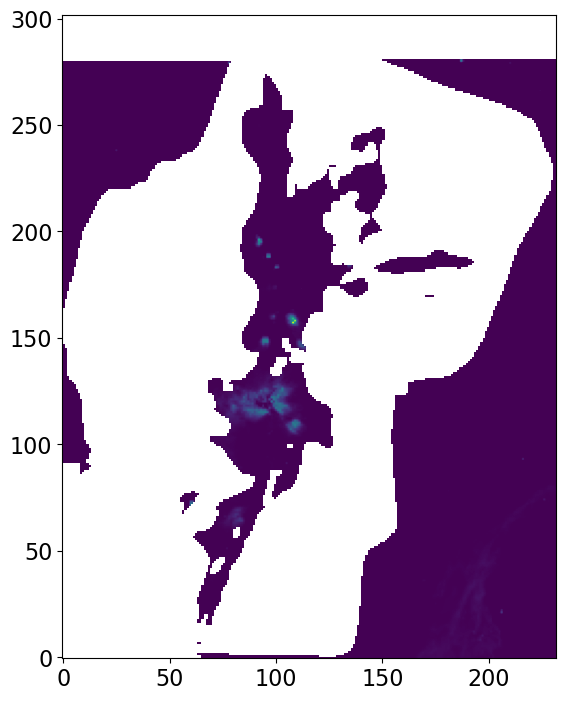

In [4]:
########## importing and testing the file
FITS1 = '../FITS_file/new_fits/DR21_OTF_full_pipeline.fits'
FITS2 = '../FITS_file/new_fits/DR21_full_NH2_Repr.fits'
FITS3 = '../FITS_file/new_fits/DR21_full_Tdust_Repr.fits'
FITS4 = '../FITS_file/new_fits/DR21_full_IRAC4_Repr.fits'
FITS5 = '../FITS_file/new_fits/DR21_full_Her250_Repr.fits'
FITS6 = '../FITS_file/new_fits/DR21_full_Fil_Mask.fits'

hdul = fits.open(FITS1)
hdul2 = fits.open(FITS2)
hdul3 = fits.open(FITS3)
hdul4 = fits.open(FITS4)
hdul5 = fits.open(FITS5)
hdul6 = fits.open(FITS6)

# print(hdul.info())

MapStokesI = hdul[0]
MapStokesIError = hdul[1]
MapStokesQ = hdul[2]
MapStokesU = hdul[4]
MapDebPol = hdul[8]
MapDebPolError = hdul[9]
MapPolAngleNonRotated = hdul[10]
MapPolAngle = hdul[11]
MapPolAngleError = hdul[12]
MapPolFlux = hdul[13]
MapPolFluxError = hdul[14]
MapColumndensity = hdul2[0]
MapTemperature = hdul3[0]
Map8Micron = hdul4[0]
MapHer250 = hdul5[0]
Mask = hdul6[0]

MapPolSNR = MapDebPol.copy()
BlankedMapPol = MapDebPol.copy()
BlankedMapPolAngle = MapPolAngle.copy()
BlankedMapPolAngleError = MapPolAngleError.copy()
BlankedMapPolAngleNonRotated = MapPolAngleNonRotated.copy() 
BlankedMapStokesI = MapStokesI.copy()
BlankedMapStokesIError = MapStokesIError.copy()
BlankedMapStokesQ = MapStokesQ.copy()
BlankedMapStokesU = MapStokesU.copy()
BlankedMapColumnDensity = MapColumndensity.copy()
BlankedMapTemperature = MapTemperature.copy()
BlankedMap8Mircon = Map8Micron.copy()
BlankedMapHer250 = MapHer250.copy()
BlankedMapDebPolError = MapDebPolError.copy()


######## taking points only with singal to noise ratio more than 3
MapPolSNR.data[:] = np.nan
MapPolSNR.data = MapDebPol.data/MapDebPolError.data


Selector = (MapPolSNR.data < 3)
BlankedMapPol.data[Selector] = np.nan
BlankedMapPolAngle.data[Selector] = np.nan
BlankedMapPolAngleError.data[Selector] = np.nan
BlankedMapStokesI.data[Selector] = np.nan
BlankedMapStokesIError.data[Selector] = np.nan
BlankedMapStokesQ.data[Selector] = np.nan
BlankedMapStokesU.data[Selector] = np.nan
BlankedMapPolAngleNonRotated.data[Selector] = np.nan
BlankedMapColumnDensity.data[Selector] = np.nan
BlankedMapTemperature.data[Selector] = np.nan
BlankedMap8Mircon.data[Selector] = np.nan
BlankedMapHer250.data[Selector] = np.nan
BlankedMapDebPolError.data[Selector] = np.nan

############## removing any points with pfrac above 50
Selector = (BlankedMapPol.data>50)
BlankedMapPol.data[Selector] = np.nan
BlankedMapPolAngle.data[Selector] = np.nan
BlankedMapPolAngleError.data[Selector] = np.nan
BlankedMapStokesI.data[Selector] = np.nan
BlankedMapStokesIError.data[Selector] = np.nan
BlankedMapStokesQ.data[Selector] = np.nan
BlankedMapStokesU.data[Selector] = np.nan
BlankedMapPolAngleNonRotated.data[Selector] = np.nan
BlankedMapColumnDensity.data[Selector] = np.nan
BlankedMapTemperature.data[Selector] = np.nan
BlankedMap8Mircon.data[Selector] = np.nan
BlankedMapHer250.data[Selector] = np.nan
BlankedMapDebPolError.data[Selector] = np.nan


############ removing any data points with I/I_error < 100
Selector = MapStokesI.data/MapStokesIError.data < 100
BlankedMapPol.data[Selector] = np.nan
BlankedMapPolAngle.data[Selector] = np.nan
BlankedMapPolAngleError.data[Selector] = np.nan
BlankedMapStokesI.data[Selector] = np.nan
BlankedMapStokesIError.data[Selector] = np.nan
BlankedMapStokesQ.data[Selector] = np.nan
BlankedMapStokesU.data[Selector] = np.nan
BlankedMapPolAngleNonRotated.data[Selector] = np.nan
BlankedMapColumnDensity.data[Selector] = np.nan
BlankedMapTemperature.data[Selector] = np.nan
BlankedMap8Mircon.data[Selector] = np.nan
BlankedMapHer250.data[Selector] = np.nan
BlankedMapDebPolError.data[Selector] = np.nan

# plt.figure(figsize=(6,6))
# plt.imshow(np.log10(MapHer250.data),origin='lower',vmin = 0 , vmax = 3)

# Selector = BlankedMap8Mircon.data < 80
# BlankedMap8Mircon.data[Selector] = np.nan


# BlankedMapColumnDensity.data = BlankedMapColumnDensity.data*(BlankedMapStokesI.data/BlankedMapStokesI.data)
# BlankedMapTemperature.data = BlankedMapTemperature.data*(BlankedMapStokesI.data/BlankedMapStokesI.data)
# BlankedMap8Mircon.data = BlankedMap8Mircon.data*(BlankedMapStokesI.data/BlankedMapStokesI.data)
# BlankedMapPolAngleError.data = BlankedMapPolAngleError.data*(BlankedMapStokesI.data/BlankedMapStokesI.data)
# BlankedMapHer250.data = BlankedMapHer250.data*(BlankedMapStokesI.data/BlankedMapStokesI.data)

############## generating the RA and DEC mesh
# DEC_grid,RA_grid = generate_RA_DEC_mesh(hdul[0])
# seperation = MapPolAngle.copy()

# CheckMapTemperature = BlankedMapTemperature.copy()
# selector = BlankedMapTemperature.data>40
# CheckMapTemperature.data[selector] = 5
# CheckMapTemperature = BlankedMapTemperature.copy()
# selector = BlankedMapTemperature.data<30
# CheckMapTemperature.data[selector] = 5


plt.figure(figsize=(6,8))
# plt.imshow(CheckMapTemperature.data,origin='lower')
plt.imshow(BlankedMap8Mircon.data ,origin='lower',vmin=80)
plt.tight_layout()
plt.show()


In [6]:
hdu2 = fits.open('../FITS_file/new_fits/S_map.fits')[1]
hdu4 = fits.open('../FITS_file/new_fits/sigma_S.fits')[1]

S_map_deb =  hdu2
sigma_S = hdu4


In [7]:
I_ridge = BlankedMapStokesI.copy()
p_ridge = BlankedMapPol.copy()
s_ridge = S_map_deb.copy()
nh2_ridge = BlankedMapColumnDensity.copy()
micron8_ridge = BlankedMap8Mircon.copy()
temp_ridge = BlankedMapTemperature.copy()
# RA_ridge = RA_grid.copy()
# DEC_ridge = DEC_grid.copy()



I_SouthFilament = BlankedMapStokesI.copy()
p_SouthFilament = BlankedMapPol.copy()
s_SouthFilament = S_map_deb.copy()
nh2_SouthFilament = BlankedMapColumnDensity.copy()
micron8_SouthFilament = BlankedMap8Mircon.copy()
temp_SouthFilament = BlankedMapTemperature.copy()
# RA_SouthFilament = RA_grid.copy()
# DEC_SouthFilament = DEC_grid.copy()



I_rest = BlankedMapStokesI.copy()
p_rest = BlankedMapPol.copy()
s_rest = S_map_deb.copy()
nh2_rest = BlankedMapColumnDensity.copy()
micron8_rest = BlankedMap8Mircon.copy()
temp_rest = BlankedMapTemperature.copy()
# RA_rest = RA_grid.copy()
# DEC_rest = DEC_grid.copy()



Selector = Mask.data != 1
I_ridge.data[Selector] = np.nan
p_ridge.data[Selector] = np.nan
s_ridge.data[Selector] = np.nan
nh2_ridge.data[Selector] = np.nan
micron8_ridge.data[Selector] = np.nan
temp_ridge.data[Selector] = np.nan
# RA_ridge[Selector] = np.nan
# DEC_ridge[Selector] = np.nan


# DEC_array = DEC_ridge.flatten()
# RA_array = RA_ridge.flatten()
# StokesI_array = I_ridge.data.flatten()
# S_array = s_ridge.data.flatten()
# P_array = p_ridge.data.flatten()
# nh2_array = nh2_ridge.data.flatten()
# temperature_array = temp_ridge.data.flatten()
# micron8_array = micron8_ridge.data.flatten()
# df = pd.DataFrame({'RA': RA_array, 'DEC': DEC_array,'P':P_array ,'I': StokesI_array,'S':S_array,'ColumnDen':nh2_array,'Temperature':temperature_array,'8micron':micron8_array})
# df.to_csv('..\data\data_ridge_dr21.csv',sep=chr(44))


Selector = (Mask.data == 1) + (Mask.data == 6)
I_rest.data[Selector] = np.nan 
p_rest.data[Selector] = np.nan
s_rest.data[Selector] = np.nan
nh2_rest.data[Selector] = np.nan
micron8_rest.data[Selector] = np.nan
temp_rest.data[Selector] = np.nan
# RA_rest[Selector] = np.nan
# DEC_rest[Selector] = np.nan

# DEC_array = DEC_rest.flatten()
# RA_array = RA_rest.flatten()
# StokesI_array = I_rest.data.flatten()
# S_array = s_rest.data.flatten()
# P_array = p_rest.data.flatten()
# nh2_array = nh2_rest.data.flatten()
# temperature_array = temp_rest.data.flatten()
# micron8_array = micron8_rest.data.flatten()
# df = pd.DataFrame({'RA': RA_array, 'DEC': DEC_array,'P':P_array ,'I': StokesI_array,'S':S_array,'ColumnDen':nh2_array,'Temperature':temperature_array,'8micron':micron8_array})
# df.to_csv('..\data\data_rest_dr21.csv',sep=chr(44))


Selector = Mask.data != 6
I_SouthFilament.data[Selector] = np.nan 
p_SouthFilament.data[Selector] = np.nan
s_SouthFilament.data[Selector] = np.nan
nh2_SouthFilament.data[Selector] = np.nan
micron8_SouthFilament.data[Selector] = np.nan
temp_SouthFilament.data[Selector] = np.nan
# RA_SouthFilament[Selector] = np.nan
# DEC_SouthFilament[Selector] = np.nan



INFO: Auto-setting vmin to -8.478e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.617e+01 [aplpy.core]


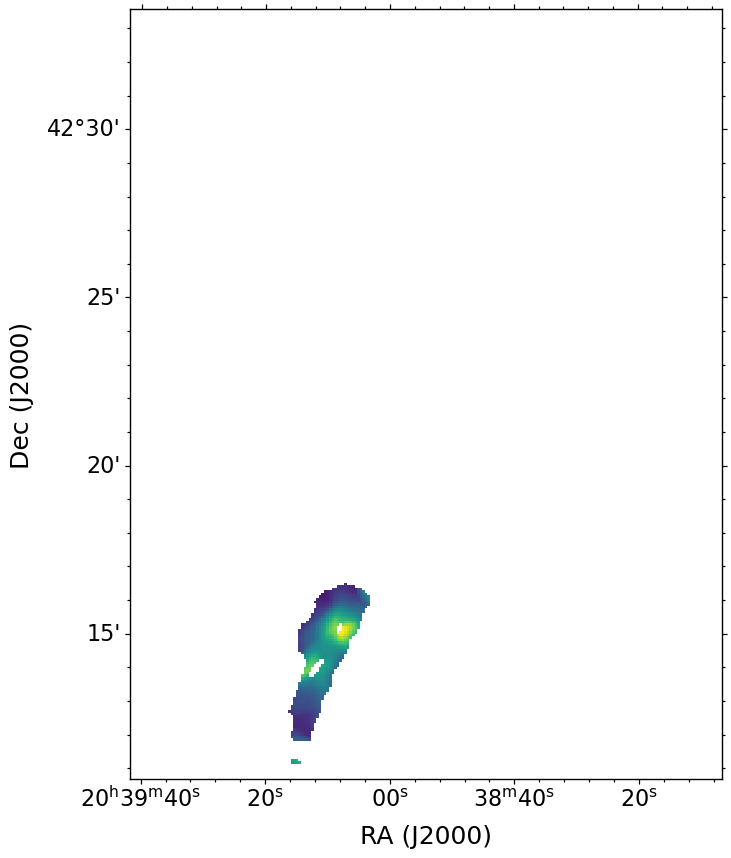

In [8]:
P_SNR_south = I_SouthFilament.copy()
I_SNR_south = I_SouthFilament.copy()
S_SNR_south = I_SouthFilament.copy()



P_SNR = BlankedMapPol.data/BlankedMapDebPolError.data
I_SNR = BlankedMapStokesI.data/BlankedMapStokesIError.data
S_SNR = S_map_deb.data/sigma_S.data

P_SNR_south.data = (I_SouthFilament.data/I_SouthFilament.data)*P_SNR
I_SNR_south.data = (I_SouthFilament.data/I_SouthFilament.data)*I_SNR
S_SNR_south.data = (I_SouthFilament.data/I_SouthFilament.data)*S_SNR


# figure
width  = 50
height = 50
cmap = 'plasma'

title_size = 16
tick_labels = 15
label_plot = 15
label_colorbar = 15
tick_colorbar = 15
label_fontsize = 20

SNRi_cut = 100
scalevec = 0.5 #1px = scalevec * 1% pol 
vec_legend = 5.0



#### SCRIPT
fig = plt.figure(figsize=(13,10))
gc = FITSFigure(S_SNR_south,figure=fig)
gc.show_colorscale(cmap='default')
# gc.add_colorbar(location='right', width=0.2, pad=0.15, ticks=None,axis_label_text= '8mciron')
# gc.show_contour(colors = 'white',levels = 7)
# gc.show_circles(RA_array,DEC_array,0.002)
plt.show()


In [9]:
filename2= '../FITS_file/iext_cal1.fits'

Herschel = fits.open(filename2)
MapHer250 = Herschel[0]

title = 'SIMPLIFI'

# figure
width  = 50
height = 50
cmap = 'plasma'

title_size = 16
tick_labels = 15
label_plot = 15
label_colorbar = 15
tick_colorbar = 15
label_fontsize = 20

SNRi_cut = 100
scalevec = 0.5 #1px = scalevec * 1% pol 
vec_legend = 5.0



#### SCRIPT
fig = plt.figure(figsize=(13,10))
gc = FITSFigure(MapHer250,figure=fig,dimensions=[0,2, 1],slices=[0])
# gc.show_colorscale(cmap='default')
# gc.add_colorbar(location='right', width=0.2, pad=0.15, ticks=None,axis_label_text= '8mciron')
# gc.show_contour(colors = 'white',levels = 7)
# gc.show_circles(RA_array,DEC_array,0.002)
plt.show()

data = MapHer250.data
print(data.shape)
# plt.imshow(data[0,:,:])
# plt.show

ValueError: dimensions= should be a tuple of two different values

<Figure size 1300x1000 with 0 Axes>

INFO: Auto-setting vmin to -5.491e+00 [aplpy.core]
INFO: Auto-setting vmax to  7.775e+01 [aplpy.core]


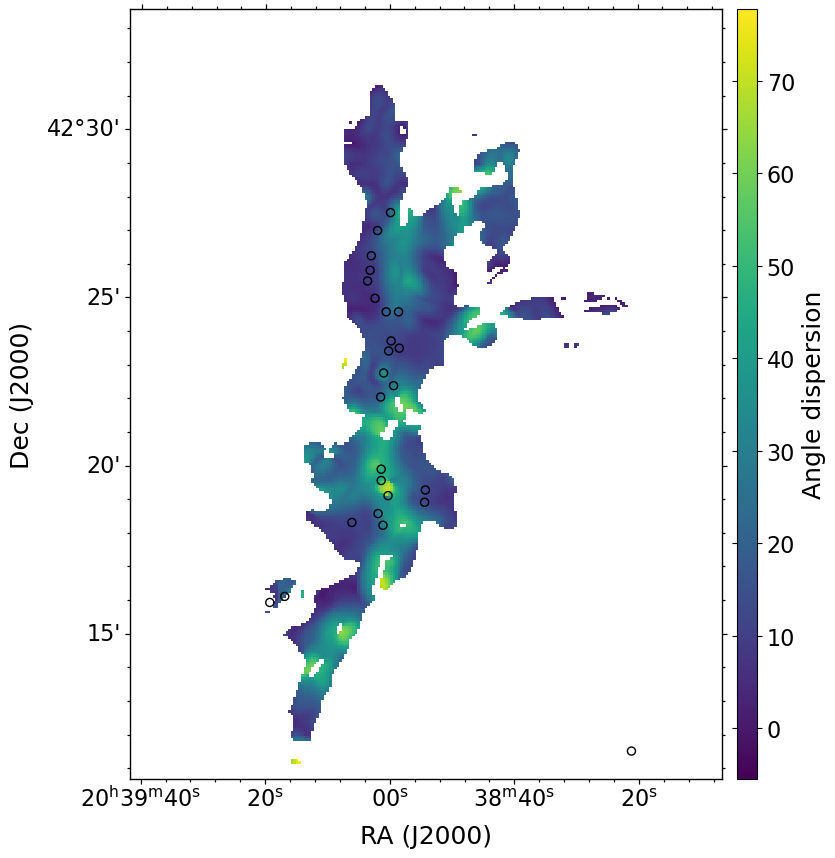

In [6]:
filename2= '../Internship-MIT/S_map.fits'

Herschel = fits.open(filename2)
MapHer250 = Herschel[1]

title = 'SIMPLIFI'

# figure
width  = 50
height = 50
cmap = 'plasma'

title_size = 16
tick_labels = 15
label_plot = 15
label_colorbar = 15
tick_colorbar = 15
label_fontsize = 20

SNRi_cut = 100
scalevec = 0.5 #1px = scalevec * 1% pol 
vec_legend = 5.0



#### SCRIPT
fig = plt.figure(figsize=(13,10))
gc = FITSFigure(MapHer250,figure=fig)
gc.show_colorscale(cmap='default')
gc.add_colorbar(location='right', width=0.2, pad=0.15, ticks=None,axis_label_text= 'Angle dispersion')
# gc.show_contour(colors = 'white',levels = 4)
gc.show_circles(RA_array,DEC_array,0.002)
plt.show()

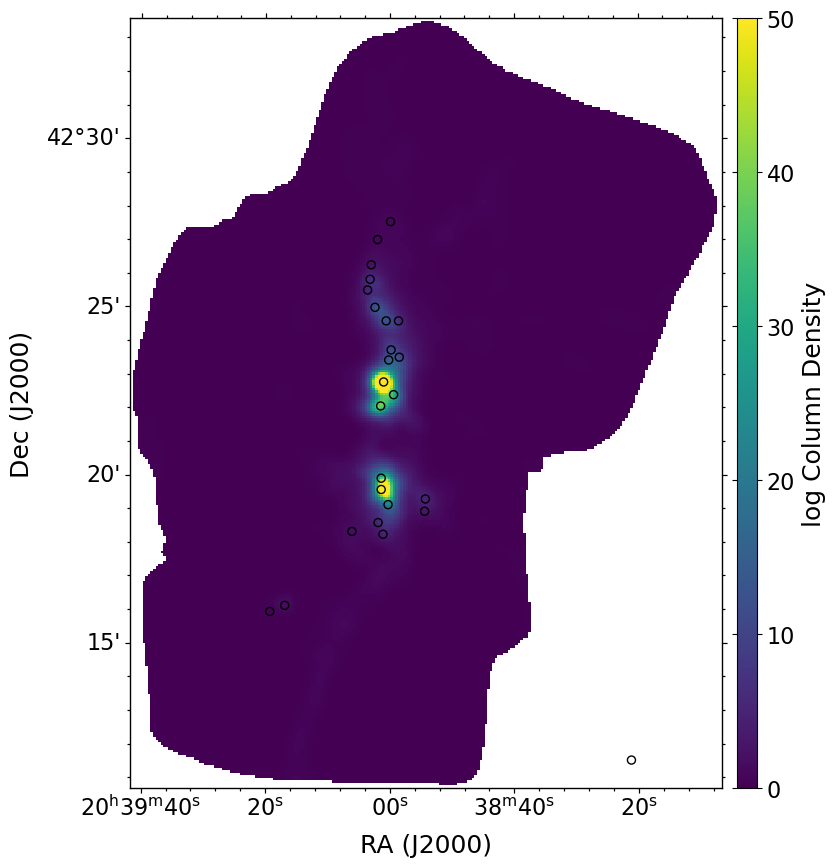

In [20]:
filename2= '../FITS_file/new_fits/DR21_OTF_full_pipeline.fits'

Herschel = fits.open(filename2)
MapHer250 = Herschel[0]

title = 'SIMPLIFI'

# figure
width  = 50
height = 50
cmap = 'plasma'

title_size = 16
tick_labels = 15
label_plot = 15
label_colorbar = 15
tick_colorbar = 15
label_fontsize = 20

SNRi_cut = 100
scalevec = 0.5 #1px = scalevec * 1% pol 
vec_legend = 5.0



#### SCRIPT
fig = plt.figure(figsize=(13,10))
gc = FITSFigure(MapHer250,figure=fig)
gc.show_colorscale(cmap='default',vmin =0,vmax = 50)
gc.add_colorbar(location='right', width=0.2, pad=0.15, ticks=None,axis_label_text= 'log Column Density')
# gc.show_contour(colors = 'white',levels = 4)
gc.show_circles(RA_array,DEC_array,0.002)
plt.show()

/var/folders/y4/98n2xscj3qd4q1yld9zwmxf00000gn/T/ipykernel_10936/494904212.py:86: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  gc.add_scalebar(vec_legend*vecscale,r'$p_{frac}$ ='+np.str(vec_legend),corner='bottom right',frame=True,color='black')


AttributeError: module 'numpy' has no attribute 'str'.
`np.str` was a deprecated alias for the builtin `str`. To avoid this error in existing code, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

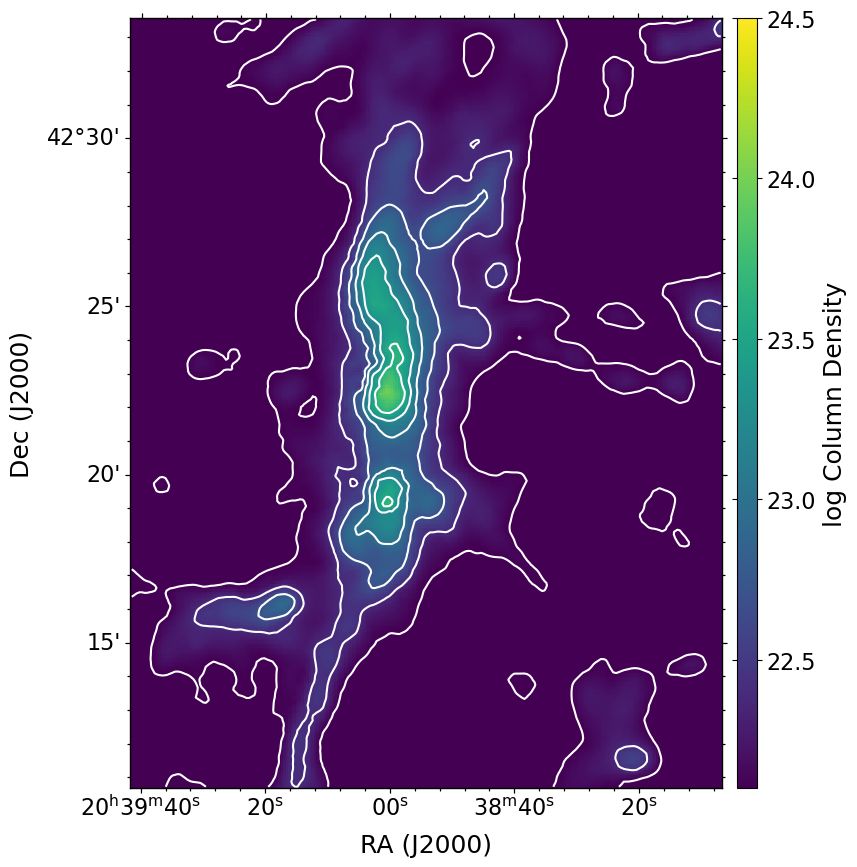

In [11]:
def get_data(infile):
	#get data
	hawc = fits.open(infile)
	p    = hawc[8]
	perr = hawc[9]
	#pa   = hawc['ROTATED POL ANGLE']
	pa   = hawc[11]
	stkI = hawc[0]
	stkIerr = hawc[1]
	pi   = hawc[15]
	pierr   = hawc[14]

	#Jy/px to Jy/sqarcsec
	pxscale = stkI.header['CDELT2']*3600
	stkI.data /= pxscale**2
	pi.data /= pxscale**2 
	stkIerr.data /= pxscale**2
	return p,perr,pa,stkI,stkIerr,pi,pierr,pxscale

def quality_cuts(stkI,stkIerr,p,perr,SNRp_cut,p_cut,SNRi_cut):
	#snr in P
	SNRp = p.data/perr.data
	mask_snrp = np.where(SNRp < SNRp_cut)
	p.data[mask_snrp] = np.nan
	#p_cut
	maskp = np.where(p.data > p_cut)
	p.data[maskp] = np.nan
	#snr in P
	SNRi = stkI.data/stkIerr.data
	mask_snri = np.where(SNRi < SNRi_cut)
	p.data[mask_snri] = np.nan
	return p


filename1='../FITS_file/new_fits/DR21_OTF_full_pipeline.fits'
filename2= '../FITS_file/new_fits/DR21_full_log_NH2_Repr.fits'

hawcp = fits.open(filename1)
Herschel = fits.open(filename2)
MapHer250 = Herschel[0]

x = hawcp['STOKES I'].data
y = hawcp['DEBIASED PERCENT POL'].data
y1=hawcp['ROTATED POL ANGLE'].data
y2 = hawcp['DEBIASED POL FLUX'].data



Herschel = fits.open(filename2)
MapHer250 = Herschel[0]

title = 'SIMPLIFI'

SNRp_cut = 3.0
p_cut = 50
width  = 50
height = 50
cmap = 'plasma'
title_size = 16
tick_labels = 15
label_plot = 15
label_colorbar = 15
tick_colorbar = 15
label_fontsize = 20
SNRi_cut = 100
scalevec = 1.5 #1px = scalevec * 1% pol 
vec_legend = 5.0


p,perr,pa,stkI,stkIerr,pi,pierr,pxscale = get_data(filename1)
p = quality_cuts(stkI,stkIerr,p,perr,SNRp_cut,p_cut,SNRi_cut)

RA = (stkI.header['OBSRA']*u.hourangle).to(u.deg)
DEC = stkI.header['OBSDEC']*u.deg


#### SCRIPT
fig = plt.figure(figsize=(13,10))
gc = FITSFigure(MapHer250,figure=fig)
gc.show_colorscale(cmap='default',vmin = 22.1,vmax = 24.5)
gc.add_colorbar(location='right', width=0.2, pad=0.15, ticks=None,axis_label_text= 'log Column Density')
gc.show_contour(colors = 'white',levels = 7)
# gc.show_vectors(p,pa,scale=scalevec,step=4,color='black',linewidth=3.5)
# gc.show_vectors(p,pa,scale=scalevec,step=4,color='yellow',linewidth=2.0)
vecscale = scalevec * pxscale/3600
gc.add_scalebar(vec_legend*vecscale,r'$p_{frac}$ ='+np.str(vec_legend),corner='bottom right',frame=True,color='black')
plt.show()
